# Two sellers

In [11]:
from buyers import EducatedBuyer
from simulations import *
from sellers import *
edubuyer = EducatedBuyer(15, 0.2)
edubuyer.check_all_offers([15,16])

['accept offer', 'competitor won']

In [2]:

import numpy as np
import matplotlib.pyplot as plt
def show_histogram(mean, stdev):
  num_samples = 1000
  samples_float = np.random.normal(mean, stdev, num_samples)
  samples = np.round(samples_float).astype(int)
  plt.hist(samples, bins=20, density=True)
  plt.show()

def sample_one_point(mean, stdev):
  num_samples = 1
  samples_float = np.random.normal(mean, stdev, num_samples)
  samples = np.round(samples_float).astype(int)
  return samples[0]

In [3]:

def two_seller_negotiation(edubuyer, sellers):
  # assume 2 sellers
  terminate = False
  while not terminate:
    offers = [seller.make_offer() for seller in sellers]
    decisions = edubuyer.check_all_offers(offers)
    terminate = ("walk away" in decisions or "accept offer" in decisions)
    # this kind of a junky way to code it 
    # but it works for now
    for i, seller in enumerate(sellers):
      new_state = {"last-offer":offers[i],
                  "comp-last-offer":(offers[:i] + offers[i+1:])[0],
                  "offers-made":seller.state["offers-made"]+1}
      seller.state = new_state
  # get reward for the agents if terminated
  profits = [None for i in range(len(sellers))]
  for i, seller in enumerate(sellers):
    if decisions[i] == "accept offer":
      profits[i]=seller.state["last-offer"]-seller.value
    elif decisions[i] == "walk away":
      profits[i]=0
    elif decisions[i] == "competitor won":
      profits[i]=0
  return profits

In [10]:
# buyer distrubution
mean = 15
stdev = 3
#show_histogram(mean, stdev)
value = 10
rounds = 10000
imp_incr = 0.1

init_offer = mean+4*stdev
range_max = init_offer
n = int((range_max-value)/2)
random_seller = RandomSeller(value=value, init_offer=range_max)
heuristic_seller = DescentArithmeticSeller(value=value, init_offer=init_offer, init_descent = n)
sellers = [random_seller, heuristic_seller]


total_profits = [0 for i in range(len(sellers))]

for i in range(rounds):
  maxprice = sample_one_point(mean,stdev)
  edubuyer = EducatedBuyer(maxprice, imp_incr)
  profits = two_seller_negotiation(edubuyer, sellers)
  for i in range(len(total_profits)):
    total_profits[i] += profits[i]
print(total_profits)

[4714, 4634]


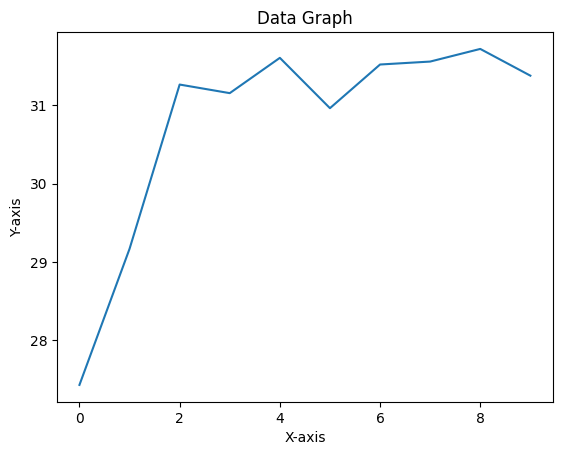

In [29]:
range_min = 11
range_max = 100
rounds = 10000
init_offer=range_max

sellerQ = QLearningSeller(value=value, init_offer=init_offer)
results = []
for i in range(10):
    result = basic_simulation(value,
                              range_min,
                              range_max,
                              imp_init=0,
                              imp_incr=imp_incr,
                              rounds = rounds,
                              seller=sellerQ,
                              verbose=False)
    results.append(result)

import matplotlib.pyplot as plt
# Plotting the data
plt.plot(results)

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Data Graph')

# Displaying the graph
plt.show()
